In [39]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
from math import pi

#alldata = players_dataframe
alldata = pd.read_csv('player_attributes.csv')

#alldata = player_attr_dataframe
#alldata.loc['mean']=player_attr_dataframe.mean()
alldata
#define new means of all players and sorting by player location
alldata.loc['mean'] = alldata.mean()
alldata.loc['Striker'] = alldata[alldata['Player Category']=='Striker'].mean()
alldata.loc['Midfielder'] = alldata[alldata['Player Category']=='Midfielder'].mean()
alldata.loc['Defender'] = alldata[alldata['Player Category']=='Defender'].mean()
alldata.loc['GoalKeeper'] = alldata[alldata['Player Category']=='GoalKeeper'].mean()
alldata

# all the sub-characters
attack = np.array(['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys'])
skill = np.array(['Dribbling','Curve','FK Accuracy','Long Passing','Ball Control'])
movement = np.array(['Acceleration','Sprint Speed','Agility','Reactions','Balance'])
power = np.array(['Shot Power','Jumping','Stamina','Strength','Long Shots'])
mentality = np.array(['Aggression','Interceptions','Positioning','Vision','Penalties','Composure'])
defending = np.array(['Marking','Standing Tackle','Sliding Tackle'])
goalkeeping = np.array(['GK Diving','GK Handling','GK Kicking','GK Reflexes'])
dic = {'attack':attack,'skill':skill,'movement':movement,'power':power,'mentality':mentality,'defending':defending}
diction = {'attack':attack,'skill':skill,'movement':movement,'power':power,'mentality':mentality,'defending':defending,'goalkeeping':goalkeeping}

# all player categories
playercat = np.array(['Striker','Midfielder','Defender'])


In [47]:
# Attack in Striker Midfielder Defender
#alldata.loc['mean_Striker'] = alldata[alldata['Player Category']=='Striker'].mean()
def plot_player_character(elem,labels,num,character,head): 
    '''
    elem : palyer category 'Striker','Midfielder','Defender','GoalKeeper'
    type : strings
    labels : sublables of the character you want to analyse
    type : array
    num : numbers of players you want to analyse
    type : int
    character: choose from attack, skill, movement, power, mentality,defending, goalkeeping
    type : string
    head : top numbers of players you want to analyse
    type ： int , range 1-1000
    '''
    stats = alldata.loc[elem, labels].head(num).values   # get values as selected
    angles = np.linspace(0,2*np.pi,len(labels),endpoint = False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    fig = plt.figure()
    ax = fig.add_subplot(111,polar =True) #set polar axis
    ax.set_ylim(0,100)   #set limits of axis
    ax.plot(angles, stats, 'o-',linewidth = 2) # draw the plot
    ax.fill(angles, stats, alpha = 0.25) #fill the area
    ax.set_thetagrids(angles*180/np.pi, labels)
    ax.set_title('mean '+ str(character)+' of top '+str(head)+' '+ str(elem))
    ax.grid(True)

def top_character(head, character): #select numbers wanted and characters 
    '''
    head : top numbers of players want to analyse
    type : int , range 1-1000
    character: choose from attack, skill, movement, power, mentality,defending, goalkeeping
    type : string
    this plot do not include Goalkeeper, use function top_character_player for it
    '''
    labels = dict[character].tolist() #get the sub-labels from character
    ment = mentality.tolist()
    num = head
    
    if labels == ment:  # check if input mentality inside
        for elem in playercat:
            #print(elem)
            if elem == 'Striker': # plot for striker
                labels = dict[character]
                index = np.argwhere(labels=='Interceptions')  # make change in character by position
                labels = np.delete(labels, index)
                plot_player_character(elem,labels,num,character,head)
                
            if elem == 'Defender':
                labels = dict[character]
                index = np.argwhere(labels=='Mentality')  # make change in character by position
                labels = np.delete(labels, index)
                plot_player_character(elem,labels,num,character,head)
            
            if elem == 'Midfielder':
                labels = dict[character]
                plot_player_character(elem,labels,num,character,head)
    else:
        for elem in playercat: # plot for other than mentality
            labels = dict[character]
            plot_player_character(elem,labels,num,character,head)           
                

def plot_all_3players(head):  # final function for all plots by player location
    '''
    head : the top numbers wanted to analyze
    '''
    
    for key in dic:
        character = key
        top_character(head, character)


In [48]:
#top_character(100, 'mentality')

In [49]:
def top_goalkeeper(head):
    '''
    head : top # of players 
    type : int ,range 1-1000
    character: choose from attack, skill, movement, power, mentality,defending, goalkeeping
    type : np.array
    this plot do not include Goalkeeper, use function top_character_player for it
    '''
    character = 'goalkeeping'
    labels = diction[character].tolist()
    num = head
    elem = 'GoalKeeper'
    plot_player_character(elem,labels,num,character,head)

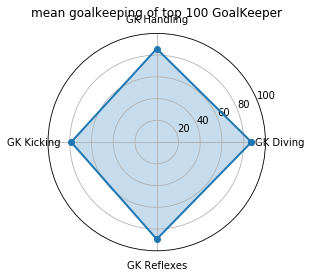

In [50]:
top_goalkeeper(100)

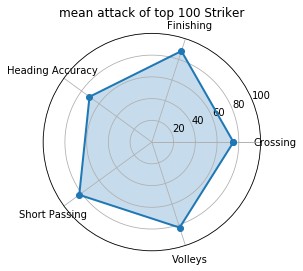

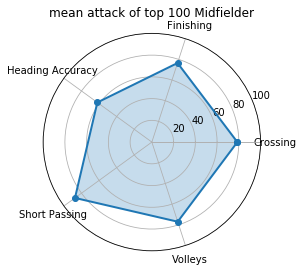

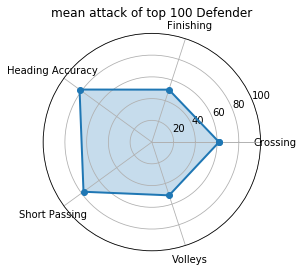

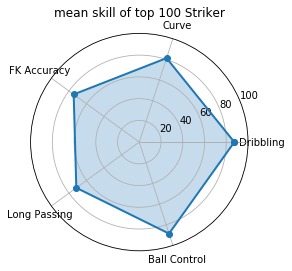

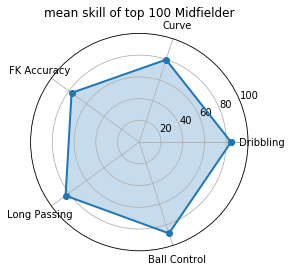

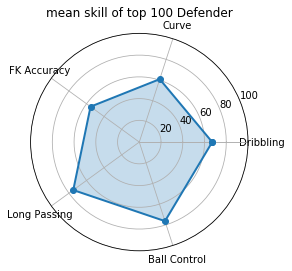

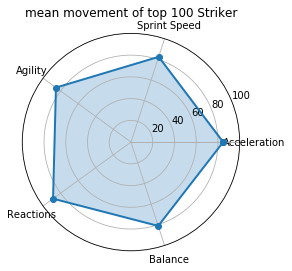

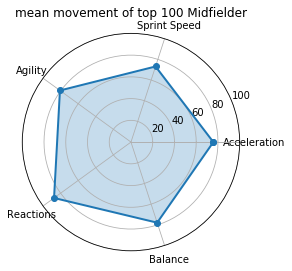

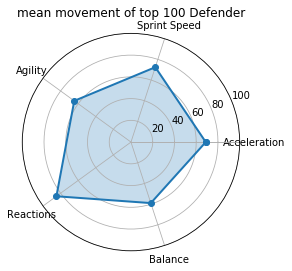

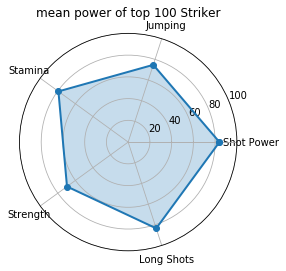

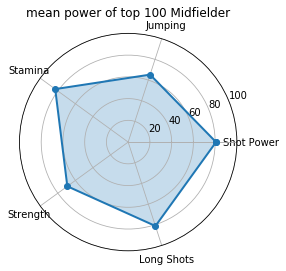

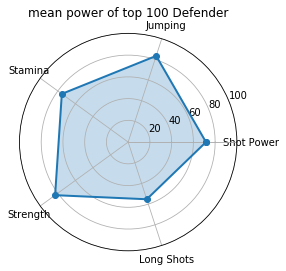

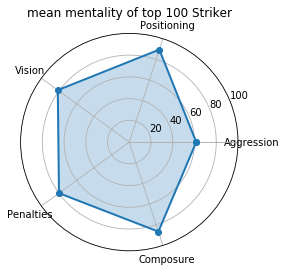

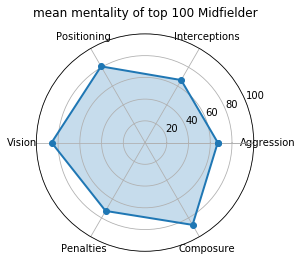

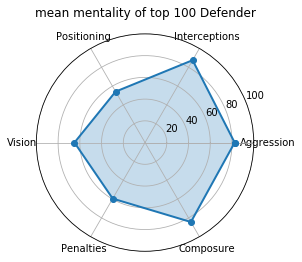

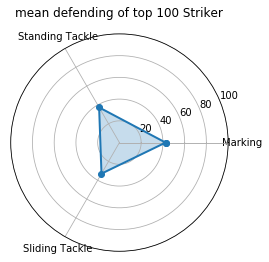

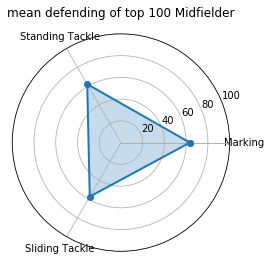

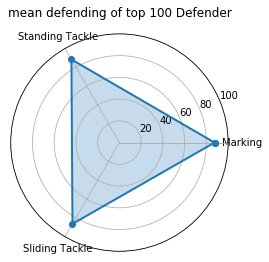

In [51]:
plot_all_3players(100)
